In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import unicodedata
import matplotlib.pyplot as plt

In [22]:
comprehensive_df = pd.read_csv('comprehensive_df.csv')

In [23]:
# Replace "Not in squad during this season" with 0
comprehensive_df['Appearances'] = comprehensive_df['Appearances'].replace("Not in squad during this season", 0)

# Convert the appearances column to numeric
comprehensive_df['Appearances'] = pd.to_numeric(comprehensive_df['Appearances'])

In [24]:
# Convert specified columns to numeric values
numeric_columns = ['Age', 'In Squad', 'Goals', 'Assists', 'Yellow Cards', 'Second Yellows', 'Straight Reds', 'Substituted On', 'Substituted Off', 'PPG', 'Placement']

for col in numeric_columns:
    comprehensive_df[col] = pd.to_numeric(comprehensive_df[col], errors='coerce')

In [25]:
comprehensive_vague_positions_df = comprehensive_df.copy()

# Function to categorize positions
def categorize_position(position):
    if "Back" in position or "Defender" in position:
        return "Defender"
    elif "Midfield" in position:
        return "Midfielder"
    elif "Goalkeeper" in position:
        return "Goalkeeper"
    else:
        return "Attacker"

# Apply the function to the Position column
comprehensive_vague_positions_df['Position'] = comprehensive_vague_positions_df['Position'].apply(categorize_position)

In [26]:
comprehensive_vague_positions_df.head(20)

,Player,Age,Position,Kit Number,Nationality,In Squad,Appearances,Goals,Assists,Yellow Cards,...,Minutes Played,Club,Season,Team,Placement,League,Champions League,Domestic Cup,TOTY,TOTY_Nominee
0,oier olazabal,18,Goalkeeper,0,Spain,2,1,0,0,0,...,90.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
1,victor valdes,26,Goalkeeper,1,Spain,52,49,0,0,3,...,4410.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
2,jose manuel pinto,32,Goalkeeper,13,Spain,51,11,0,0,1,...,990.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
3,albert jorquera,29,Goalkeeper,25,Spain,20,1,0,0,0,...,90.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
4,andreu fontas,18,Defender,0,Spain,1,0,0,0,0,...,0.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
5,alberto botia,19,Defender,0,Spain,5,1,0,0,0,...,27.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
6,martin caceres,21,Defender,2,Uruguay,51,23,0,0,3,...,1523.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
7,marc muniesa,16,Defender,0,Spain,2,1,0,0,0,...,31.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
8,gerard pique,21,Defender,3,Spain,50,45,3,1,7,...,3932.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
9,rafa marquez,29,Defender,4,Mexico,41,37,3,3,7,...,3020.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0


In [27]:
comprehensive_vague_positions_df.dtypes

Player               object
Age                   int64
Position             object
Kit Number            int64
Nationality          object
In Squad              int64
Appearances           int64
Goals                 int64
Assists               int64
Yellow Cards          int64
Second Yellows        int64
Straight Reds         int64
Substituted On        int64
Substituted Off       int64
PPG                 float64
Minutes Played      float64
Club                 object
Season               object
Team                 object
Placement             int64
League               object
Champions League      int64
Domestic Cup          int64
TOTY                  int64
TOTY_Nominee          int64
dtype: object

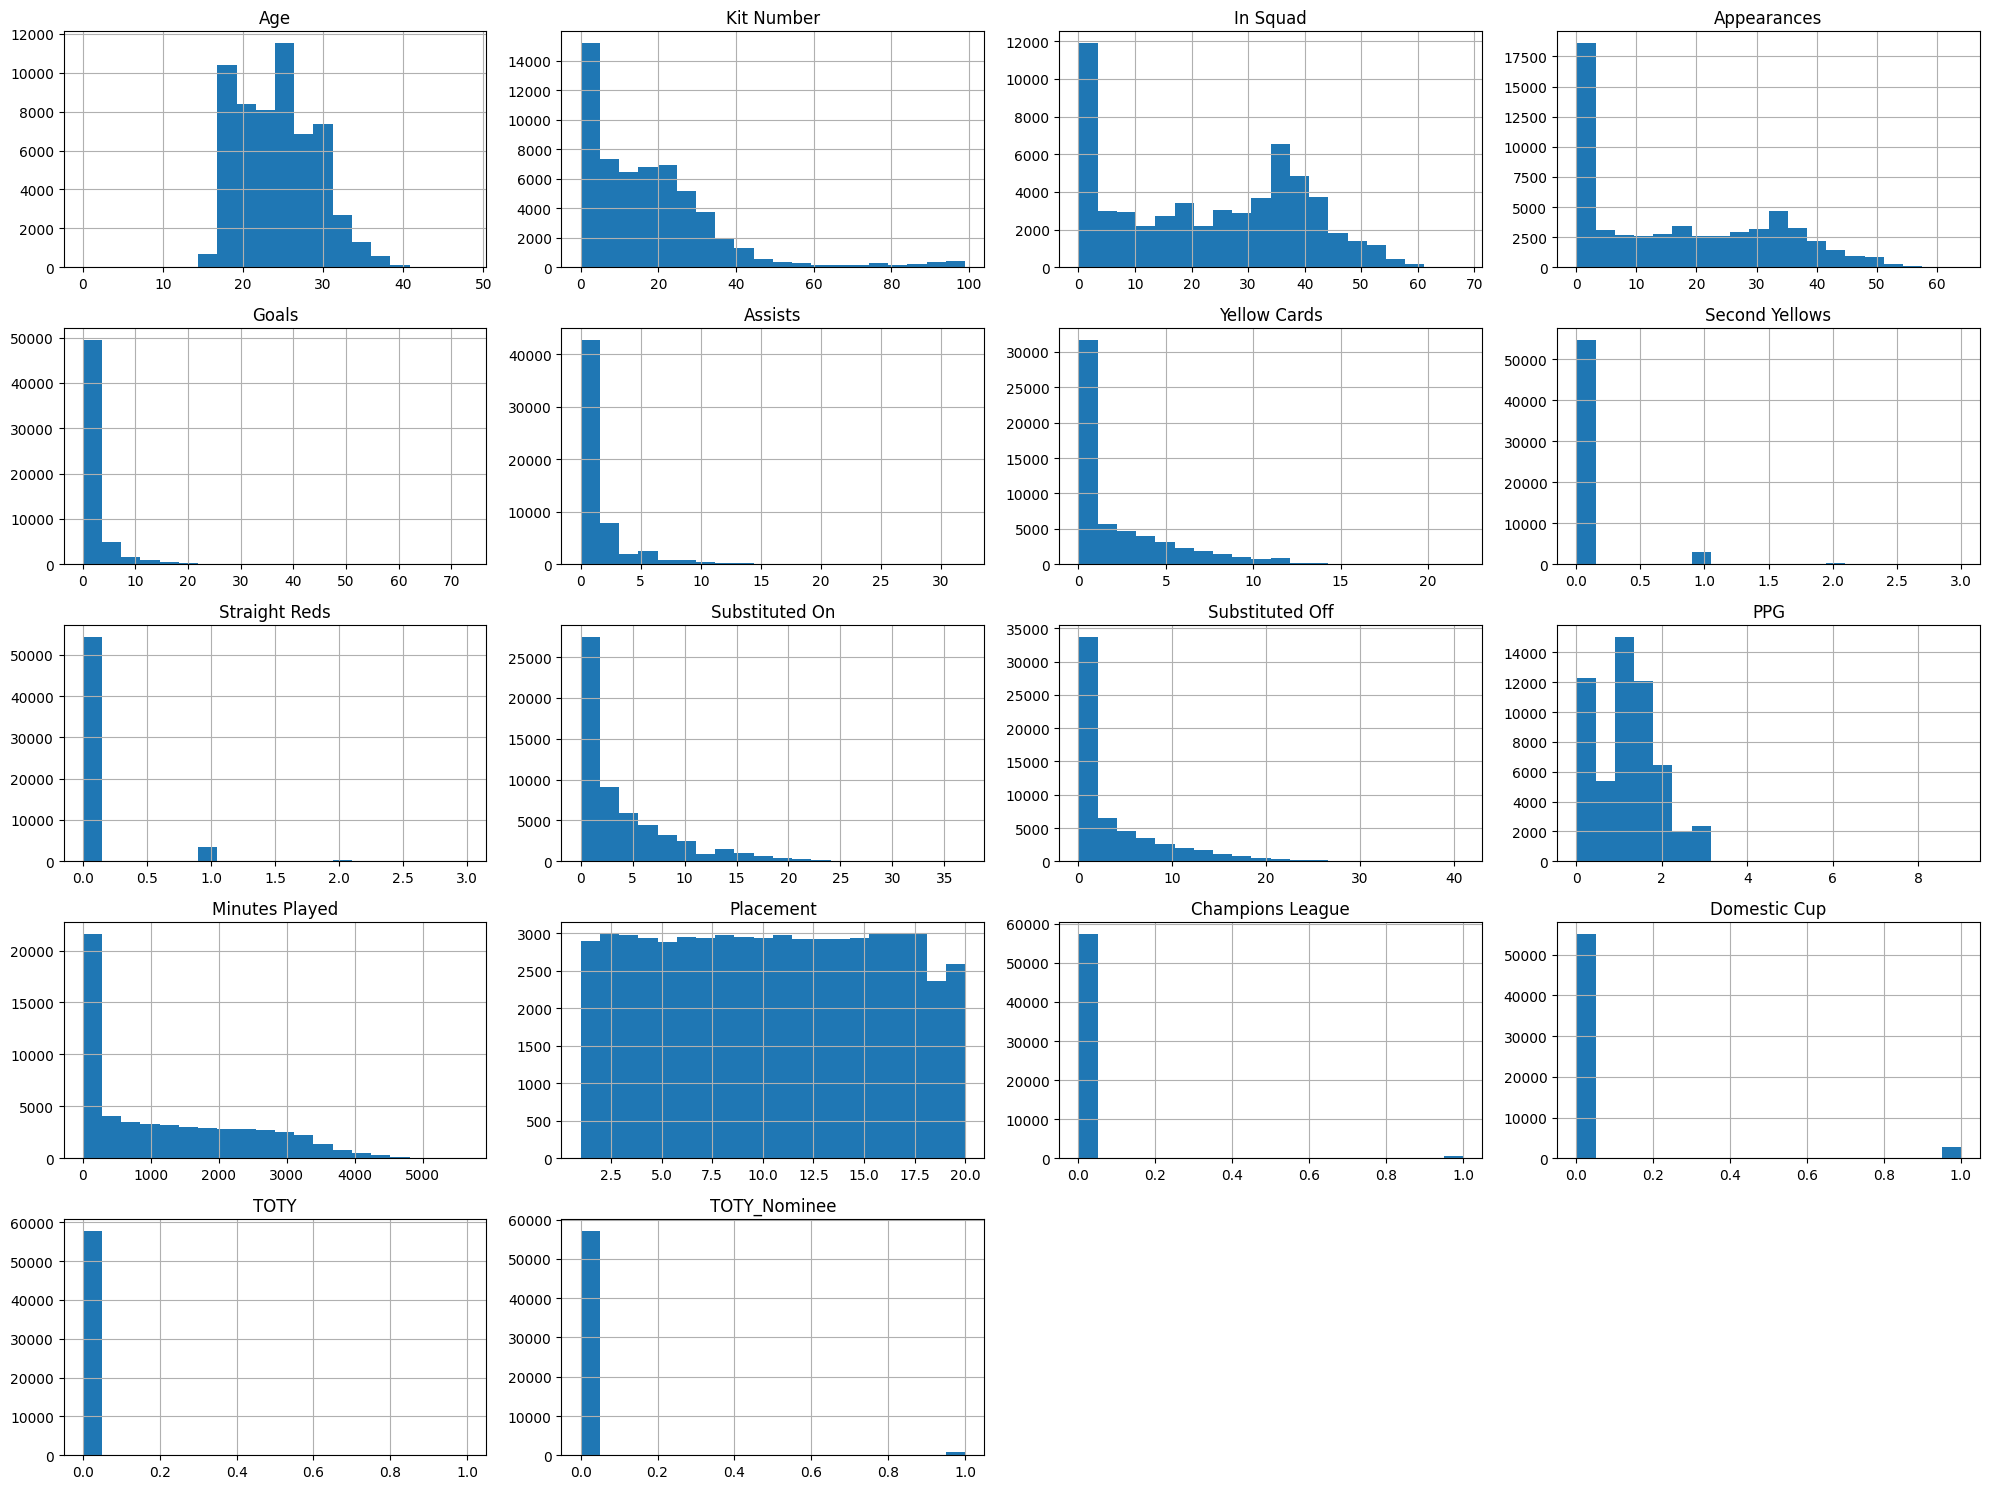

In [28]:
# Plot histograms for all features
comprehensive_vague_positions_df.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [29]:
# Filter out players with appearances 5 and below
comprehensive_vague_positions_df = comprehensive_vague_positions_df[comprehensive_vague_positions_df['Appearances'] > 10]

In [30]:
# Drop the 'Player', 'Kit Number', and 'Nationality' columns
comprehensive_vague_positions_df.drop(columns=['Player', 'Kit Number', 'Nationality', 'Team', 'Club'], inplace=True)

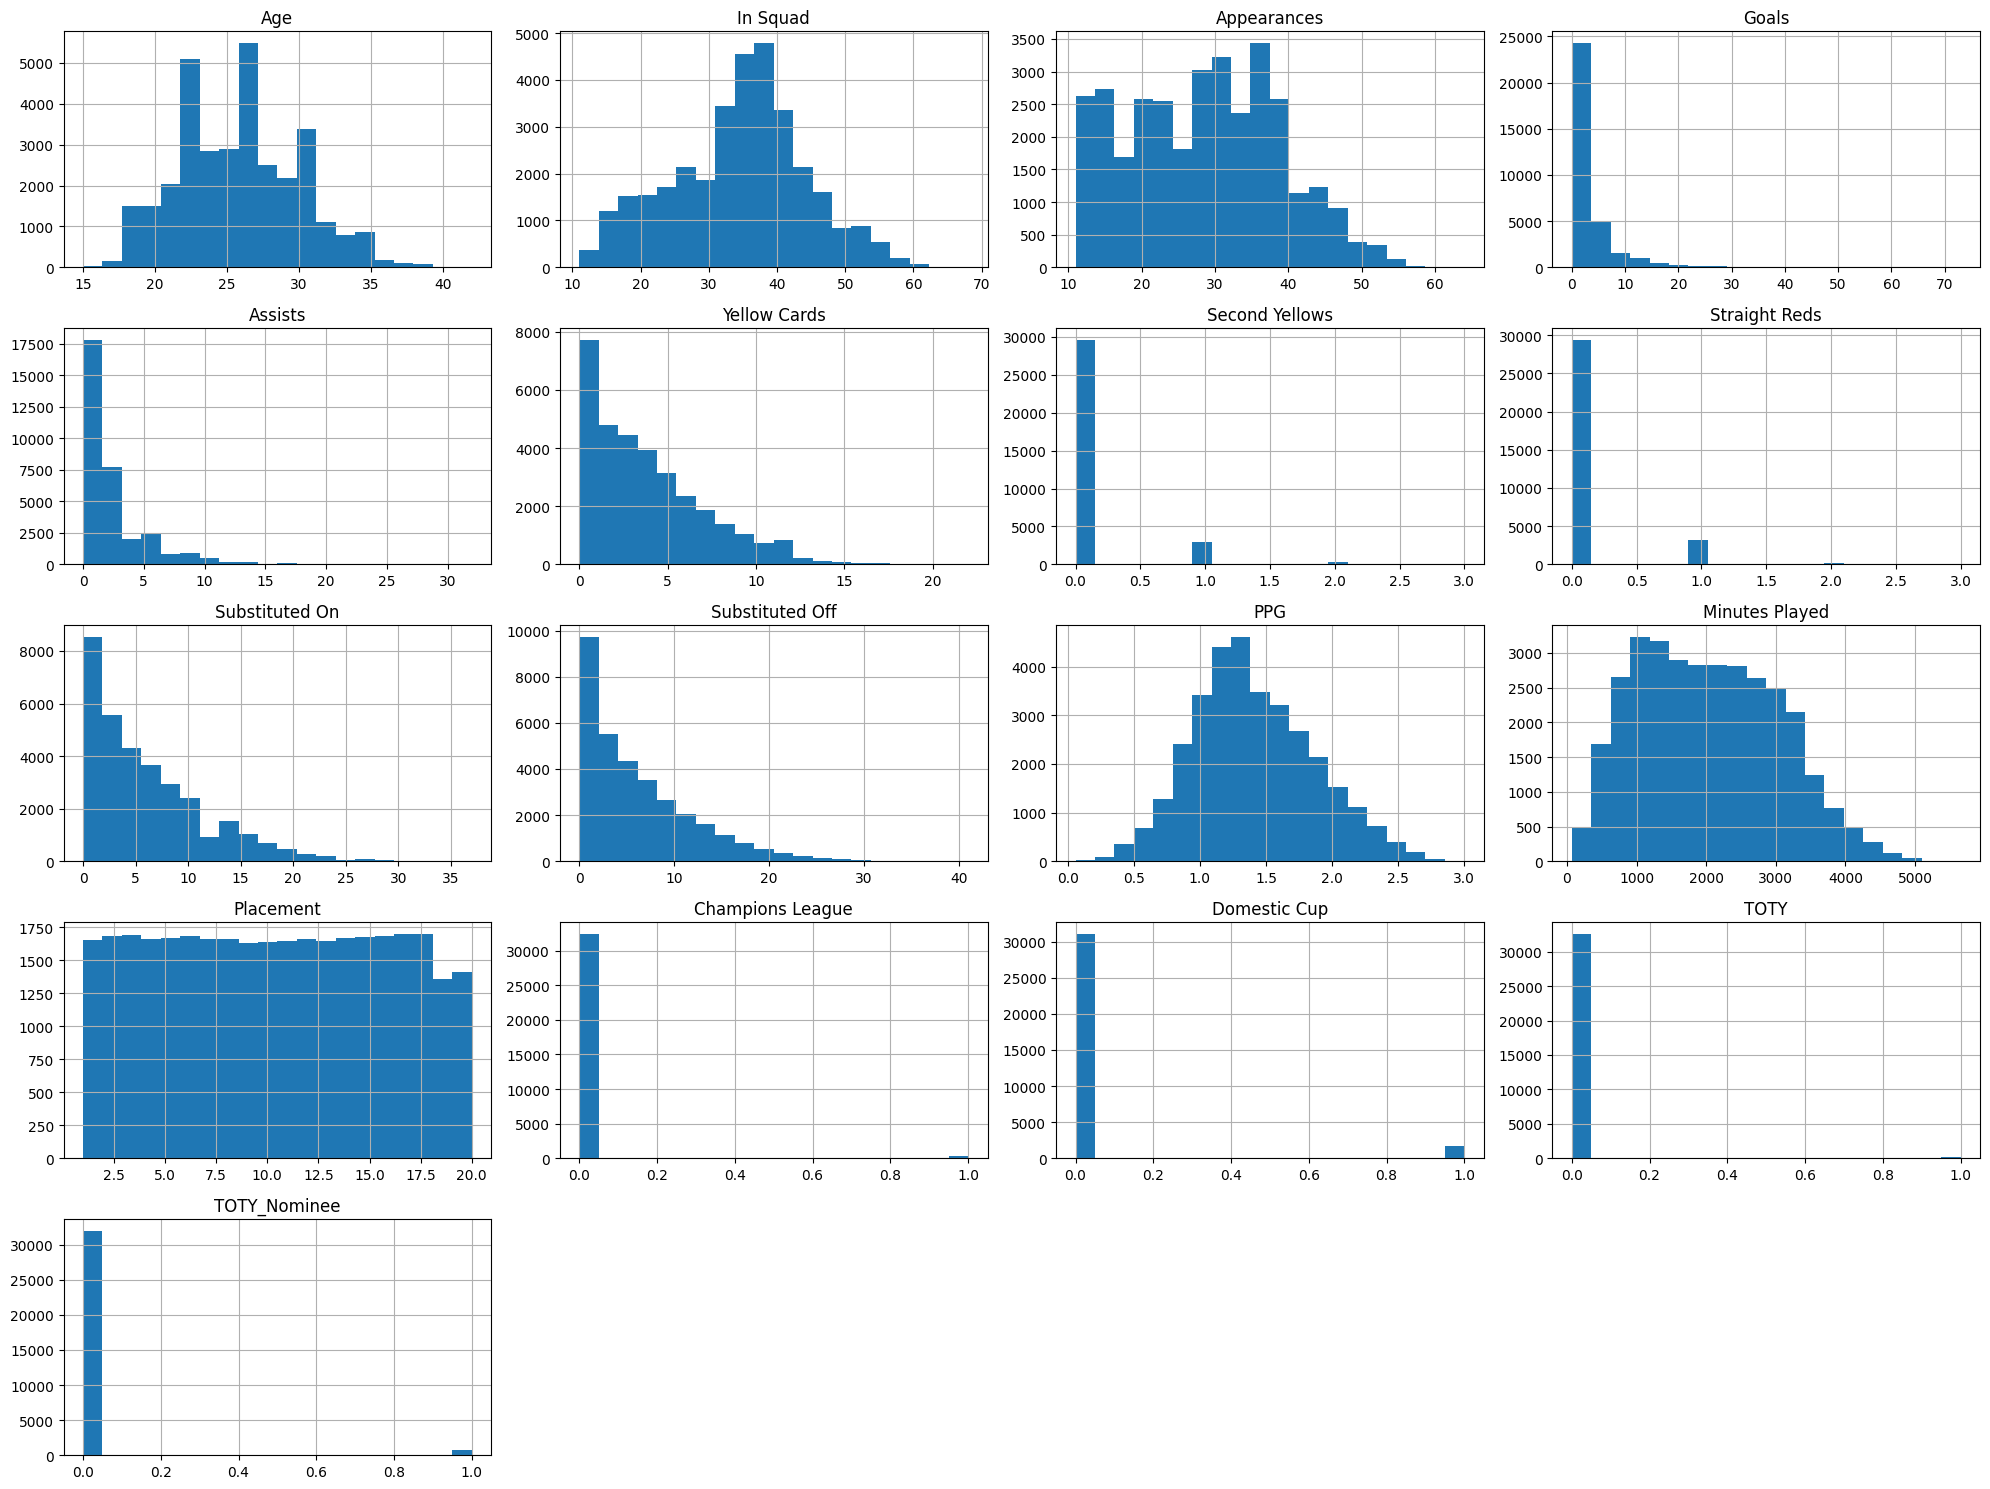

In [31]:
# Plot histograms for all features
comprehensive_vague_positions_df.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [34]:
# Check for NaN values in the DataFrame
print("NaN values in each column:")
print(comprehensive_vague_positions_df.isnull().sum())

NaN values in each column:
Age                 0
Position            0
In Squad            0
Appearances         0
Goals               0
Assists             0
Yellow Cards        0
Second Yellows      0
Straight Reds       0
Substituted On      0
Substituted Off     0
PPG                 1
Minutes Played      0
Season              0
Placement           0
League              0
Champions League    0
Domestic Cup        0
TOTY                0
TOTY_Nominee        0
dtype: int64


In [38]:
# Handle NaN values in the PPG column
ppg_median = comprehensive_vague_positions_df['PPG'].median()
comprehensive_vague_positions_df['PPG'] = comprehensive_vague_positions_df['PPG'].fillna(ppg_median)

In [39]:
# Check for NaN values in the DataFrame
print("NaN values in each column:")
print(comprehensive_vague_positions_df.isnull().sum())

NaN values in each column:
Age                 0
Position            0
In Squad            0
Appearances         0
Goals               0
Assists             0
Yellow Cards        0
Second Yellows      0
Straight Reds       0
Substituted On      0
Substituted Off     0
PPG                 0
Minutes Played      0
Season              0
Placement           0
League              0
Champions League    0
Domestic Cup        0
TOTY                0
TOTY_Nominee        0
dtype: int64


In [40]:
comprehensive_vague_positions_df.to_csv('vague_position_model_data.csv', index=False)